## Dataset

**Dataset Information:**

We'll be working on a dataset containing 2000 samples of the wireless signal strengths of 7 routers set up in a bounded indoor space. The signal strengths are observed on a smartphone and can be used to determine the user location.

+ Each of the first 7 columns corresponds to the strengths of signals received from one of the 7 routers. 
+ The last column corresponds to one of the four rooms in the indoor experimentation space.

**Dataset Source:**
https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization

In [1]:
import pandas as pd
import numpy  as np
import math   as math
import matplotlib.pyplot as plt
import copy as copy
import sys as sys

+ Read the data from its URL (https://archive.ics.uci.edu/ml/machine-learning-databases/00422/wifi_localization.txt) to a pandas DataFrame df
+ Rename the columns of df using a list ['WS1', 'WS2', 'WS3', 'WS4', 'WS5', 'WS6', 'WS7', 'Location']
+ Split df into training, validation, and testing datasets using a 14:3:3 ratio
+ Build a decision tree model (*hint: sklearn's DecisionClassifier*) using the training dataset to predict the user location based on the wireless signal strengths
+ Visualize the decision tree structure. No need to build from scratch.
+ Apply the decision tree model to the validation dataset and calculate the resulting accuracy rate

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00422/wifi_localization.txt', sep = '\s+', header = None)

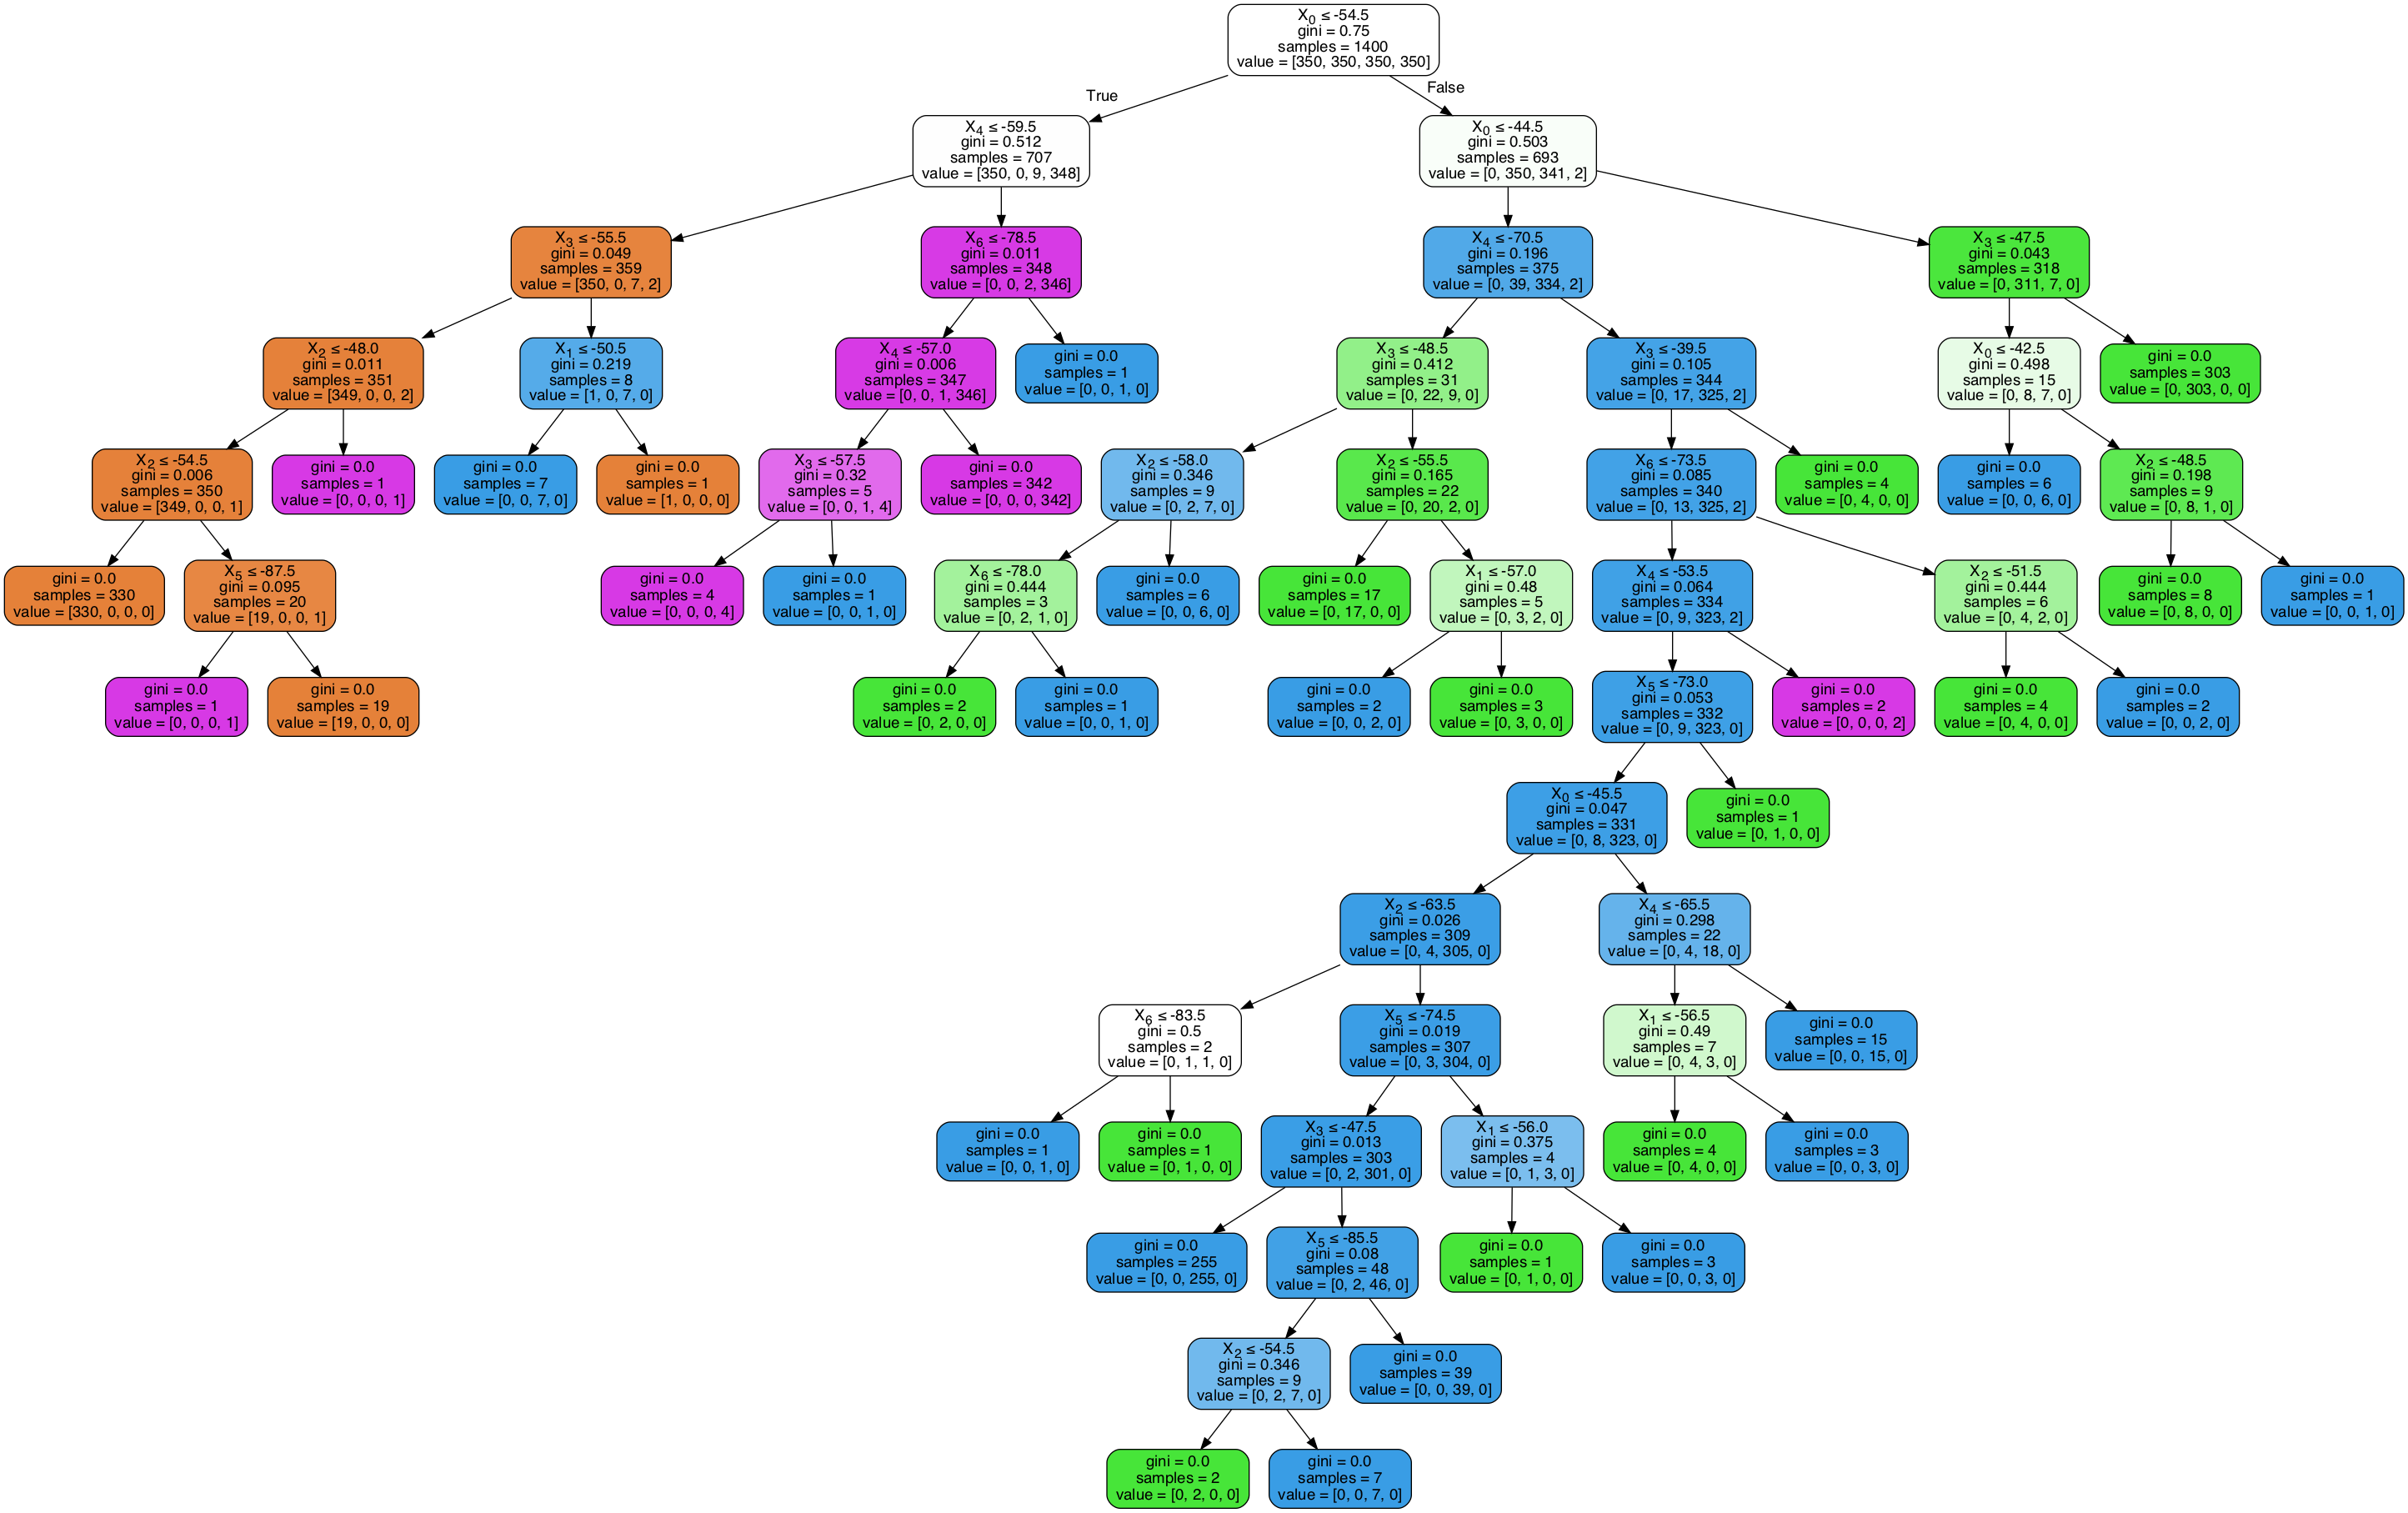

In [3]:
df.columns = ['WS1', 'WS2', 'WS3', 'WS4', 'WS5', 'WS6', 'WS7', 'Location']
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#Creating X and Y
df.columns = ['WS1', 'WS2', 'WS3', 'WS4', 'WS5', 'WS6', 'WS7', 'Location']
X = np.array(df.iloc[:,0:7])
Y = np.array(df.iloc[:,7])

#split train, validation, test datasets
split = StratifiedShuffleSplit(test_size=0.3, random_state=42)
split_half = StratifiedShuffleSplit(test_size=0.5, random_state=42)
for train_index, vt_index in split.split(X,Y):
    X_train, X_vt = X[train_index], X[vt_index]
    Y_train, Y_vt = Y[train_index], Y[vt_index]
X_val, X_test = np.split(X_vt,2)
Y_val, Y_test = np.split(Y_vt,2)

#fit decision tree model and use it to predict validation dataset
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)
clf.predict(X_val)

#visulize the decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [4]:
#compute accuracy
clf.score(X_val, Y_val)

0.9766666666666667

The predicting accuracy is 97.66666666666667% for this validation dataset

+ Create a bar chart to visualize the relative importance by feature based on the decision tree model built in exercise 1
+ Features in the chart are sorted in descending order of their importance

Text(0.5, 1.0, 'Feature Importance Bar Chart')

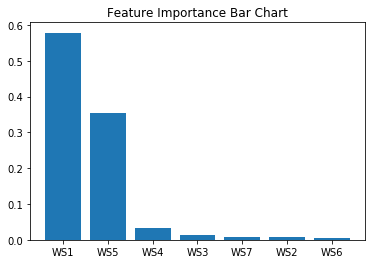

In [5]:
features_imp_dic = {
                'feature': np.array(df.columns[0:7]),
                'importance':clf.feature_importances_
               }
features_imp = pd.DataFrame(features_imp_dic)
features_imp.sort_values(by = 'importance', ascending = False, inplace = True)
features_sort = pd.Series(features_imp['feature'])
importance_sort = pd.Series(features_imp['importance'])
ax = plt.subplot()
plt.rc("figure", figsize = (12, 8))
ax.bar(features_sort, importance_sort)
ax.set_title("Feature Importance Bar Chart")

+ Build a random forest classifier (*hint: sklearn's RandomForestClassifier*) using the training dataset and find a set of the top-performing parameters (e.g. max_depth, max_features, min_samples_split, min_samples_leaf and n_estimators) via a random search with a 5-fold cross-validation
+ Apply the random forest classifier with the best parameters identified to the validation dateset prepared in exercise 1 and calculate the resulting accuracy rate

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [7]:
RFC = RandomForestClassifier(random_state=42)
param_dis = {
                'n_estimators' : [3,30,100],
                'criterion': ['gini', 'entropy'],
                'max_depth':[1,2,3,4,5,6,7,8,9,10],
                'min_samples_split':[2,5,8,16,32],
                'min_samples_leaf':[1,2,8],
                'max_features':[2, 4, 6, 7]
            }                
                
RDS = RandomizedSearchCV(RFC, param_distributions = param_dis, scoring = 'accuracy', cv = 5, n_iter=100, return_train_score=True)
RDS.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [3, 30, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 5, 8, 16, 32], 'min_samples_leaf': [1, 2, 8], 'max_features': [2, 4, 6, 7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='accuracy', verbose=0)

In [8]:
RDS.best_params_

{'n_estimators': 100,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_features': 4,
 'max_depth': 9,
 'criterion': 'gini'}

In [14]:
RFC_best = RandomForestClassifier(n_estimators = 30, criterion = 'gini', max_depth = 9, 
                             min_samples_split = 16, min_samples_leaf = 1, max_features = 4,
                             random_state=42)
RFC_best.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=16,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [15]:
RFC_result = RFC_best.predict(X_val)
(Y_val == RFC_result).sum() / len(Y_val)

0.98

Accuracy = 0.98

+ Refit the random forest model on the training dataset using the best parameters identified in exercise 3
+ Compute the accuracy rate for the out-of-bag instances

In [16]:
RFC_best = RandomForestClassifier(criterion='entropy', max_depth=6, max_features=4, min_samples_leaf=8,
                                  min_samples_split=5, n_estimators=30,random_state=42, oob_score = True)
RFC_best.fit(X_train, Y_train)
RFC_best.oob_score_

0.9757142857142858

+ Create four separate functions to calculate the entropy, gini impurity, and misclassification error respectively for any given node in a binary decision tree classifier
+ Each function has a single input argument, i.e. the percentage of instances that belong to one of the two classes
+ Create a multiline chart to compare the values of entropy, gini impurity, and misclassification error across the probability range of [0,1]

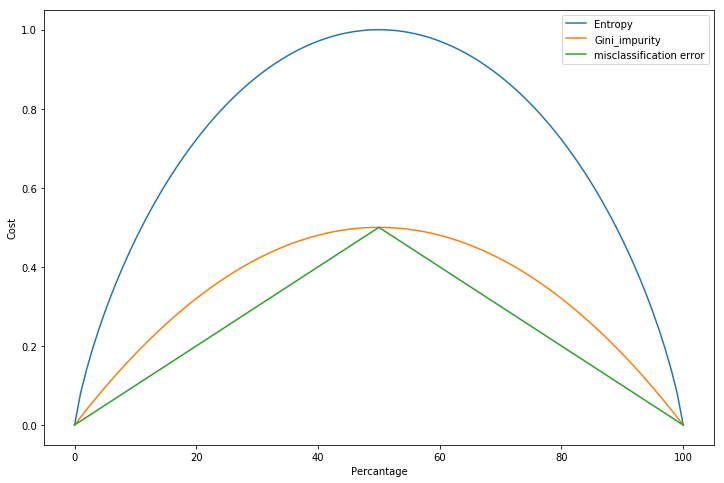

In [17]:
def entropy(p):
    sum = 0
    for x in p:
        if (x == 0):
            pass
        else:
            sum = sum + x*math.log2(x)
    return -1 * sum
    
def gini_impurity(p):
    sum = 0
    for x in p:
        sum = sum + x**2
    return 1 - sum

def miscla_error(p):
    max = -1 * sys.maxsize
    for x in p:
        if (x > max):
            max = x
    return 1 - max

p1 = np.linspace(0,1,101)

def calc(p):
    entro = []
    gini = []
    miscla = []
    for x in p1:
        entro.append(entropy([x, 1-x]))
        gini.append(gini_impurity([x, 1-x]))
        miscla.append(miscla_error([x, 1-x]))
    ax5 = plt.subplot()
    
    ax5.plot(entro,  label='Entropy')
    ax5.plot(gini,   label='Gini_impurity')
    ax5.plot(miscla, label="misclassification error")
    ax5.legend(loc = 'best')
    ax5.set_xlabel("Percantage")
    ax5.set_ylabel("Cost")
calc(p1)

+ Build a gradient boosting classifier (*hint: sklearn's GradientBoostingClassifier*) using the training dataset and find a set of top-performing parameters (e.g. learning_rate, max_depth, max_features, min_samples_split, min_samples_leaf and n_estimators) via a random search with a 5-fold cross-validation
+ Apply the gradient boosting classifier with the best parameters identified to the validation dateset prepared in exercise 1 and calculate the resulting accuracy rate

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
GBC =  GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, 
                                  max_depth=1, random_state=0)
params_GBC = {
                "n_estimators" : [3,30,100], 
                "learning_rate" : [0.1, 0.01, 0.001, 0.0001], 
                "max_depth"     : list(range(1,11)),
                "max_features"  : list(range(1,8)),
                "min_samples_split" : [2, 5, 8, 16, 32], 
                "min_samples_leaf"  : [1,2,4,8] 
             }
RDS_GBC = RandomizedSearchCV(GBC, param_distributions = params_GBC, scoring = 'accuracy', cv = 5, 
                   n_iter=100, return_train_score=True)
RDS_GBC.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [3, 30, 100], 'learning_rate': [0.1, 0.01, 0.001, 0.0001], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [1, 2, 3, 4, 5, 6, 7], 'min_samples_split': [2, 5, 8, 16, 32], 'min_samples_leaf': [1, 2, 4, 8]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='accuracy', verbose=0)

In [19]:
RDS_GBC.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': 1,
 'max_depth': 7,
 'learning_rate': 0.1}

In [20]:
GBC_best =  GradientBoostingClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 8,
                                       max_features = 1, learning_rate = 0.1, 
                                       max_depth = 7, random_state = 42)

GBC_best.fit(X_train, Y_train)
result_GBC = GBC_best.predict(X_val) 
(result_GBC == Y_val).sum() / len(Y_val)


0.9833333333333333

Accuracy = 0.9833333333333333

+ Develop an ensemble model using the blending technique, i.e.
    + apply the desicion tree, random forest, and gradient boosting models trained in exercise 1, 3, and 6 to the validation  dataset respectively and make three series of predictions for the validation dataset
    + train a new classification model, i.e. a blender, using the three series of predictions made in the previous step as input features to predict the user location. Feel free to choose an algorithm of your interest for the blender.
+ Compare the accuracy of your ensemble model with the decision tree, random forest, and gradient boosting models trained in exercise 1, 3, and 6, i.e.
    + apply your desicion tree, random forest, gradient boosting, and ensemble models to the testing dataset prepared in exercise 1 and compare the four resulting accuracy rates

In [22]:
#decision tree
clf.fit(X_train, Y_train)
DT_result = clf.predict(X_val)
DT_accuracy = (DT_result == Y_val).sum() / len(Y_val)
print("DT accuracy = ", DT_accuracy)

#random forest
RFC_best.fit(X_train, Y_train)
RFC_result = RFC_best.predict(X_val)
RFC_accuracy = (RFC_result == Y_val).sum() / len(Y_val)
print("RFC accuracy = ", RFC_accuracy)

#gradient boosting classifier
GBC_best.fit(X_train, Y_train)
GBC_result = GBC_best.predict(X_val)
GBC_accuracy = (GBC_result == Y_val).sum() / len(Y_val)
print("GBC accuracy = ", GBC_accuracy)

DT accuracy =  0.9766666666666667
RFC accuracy =  0.9733333333333334
GBC accuracy =  0.9833333333333333


In [460]:
# combining results from all 3 models
models_result = pd.DataFrame({'dt': DT_result, 'rfc': RFC_result, 'gbc': GBC_result})
mr_series = models_result.iloc[:, 0:3]

In [473]:
# use grid search to find best parameter for the blending model, which is KNN.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier(n_neighbors=3)

params_ensemble = {
                "n_neighbors" : list(range(1,11)), 
                "leaf_size" : [3, 10 , 30, 100], 
                "p"     : [1,2],
                "weights"  : ['uniform', 'distance'],
             }
ensemble_gs = GridSearchCV(neigh, params_ensemble, scoring = 'accuracy', cv = 5, 
                    return_train_score=True)
ensemble_gs.fit(mr_series, Y_val)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'leaf_size': [3, 10, 30, 100], 'p': [1, 2], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [474]:
ensemble_gs.best_params_

{'leaf_size': 3, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

In [489]:
#Train the KNN model
neigh = KNeighborsClassifier(n_neighbors = 5, leaf_size = 3, p = 1, weights = 'uniform')
neigh.fit(mr_series, Y_val)
DT_result_test = clf.predict(X_test)
RFC_result_test = RFC_best.predict(X_test)
GBC_result_test = GBC_best.predict(X_test)

#combining results of test dataset by all 3 models
models_result_pd = pd.DataFrame({"dt" : DT_result_test,
              "rfc": RFC_result_test,
              "gbc": GBC_result_test
             })
models_result_test = models_result_pd.iloc[:,0:3]

#calculate and print accuracy of each of 3 models
print("DT test accuracy = ", (DT_result_test == Y_test).sum() / len(Y_test))
print("RFC test accuracy = ", (RFC_result_test == Y_test).sum() / len(Y_test))
print("GBC test accuracy = ", (GBC_result_test == Y_test).sum() / len(Y_test))

#use the blending model to predict the test set, calculate its accuracy
blending_result = neigh.predict(models_result_test)
(blending_result == Y_test).sum() / len(Y_test)

DT test accuracy =  0.97
RFC test accuracy =  0.96
GBC test accuracy =  0.9766666666666667


0.9733333333333334

The accuracy of ensemble model (0.9733333333333334) is better decision tree and random forest, while worse than gradient boosting since gradient boosting
model gave perfect prediction to this dataset